<a href="https://colab.research.google.com/github/Burak-Akca/Image-Classification/blob/main/retinal_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"burakaka","key":"93611fc8dc3513e800fffcd15cdbb18f"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle competitions download -c aptos2019-blindness-detection

100% 9.51G/9.51G [04:31<00:00, 41.3MB/s]
100% 9.51G/9.51G [04:31<00:00, 37.6MB/s]


In [5]:
import zipfile

In [6]:
zip_ref=zipfile.ZipFile("aptos2019-blindness-detection.zip")

In [7]:
zip_ref.extractall()

In [8]:
zip_ref.close()

In [9]:
import pandas as pd

In [10]:
df=pd.read_csv("train.csv",sep=",")

In [11]:
df.head()

id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0

<Axes: >

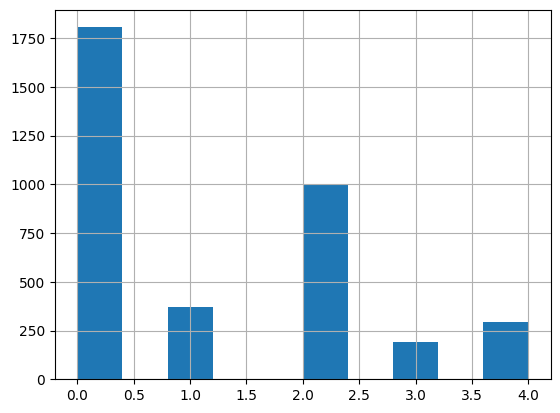

In [12]:
df.diagnosis.hist()

In [13]:
df.diagnosis.value_counts()

diagnosis
0    1805
2     999
1     370
4     295
3     193
Name: count, dtype: int64

In [14]:
df.sort_values(by="id_code",inplace=True)

In [15]:
import os

In [16]:
files=os.listdir("train_images")

In [17]:
type(files)

list

In [18]:
len(files)

3662

In [19]:
import cv2

In [24]:
img_list=list()
for i in files[:20]:
  img=cv2.imread("train_images/"+i)
  img=cv2.resize(img,(400,400))
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img_list.append(img)

In [22]:
import matplotlib.pyplot as plt

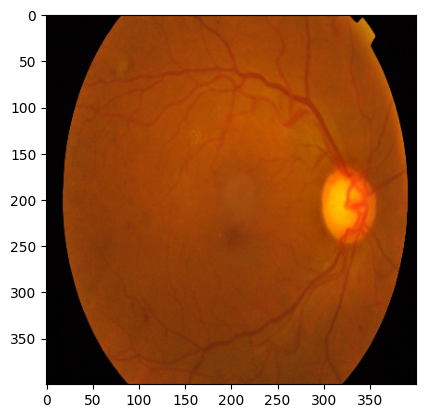

In [28]:
plt.imshow(img_list[4])

In [29]:
copied_file=img_list[4].copy()

In [30]:
copied_file=cv2.cvtColor(copied_file,cv2.COLOR_RGB2GRAY)

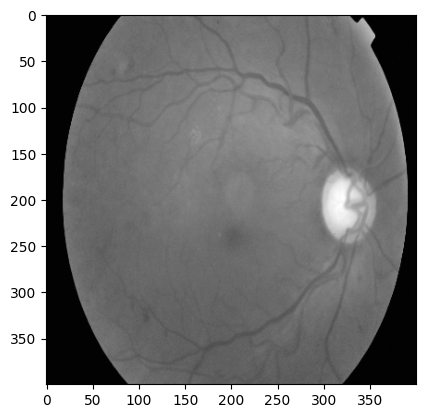

In [34]:
plt.imshow(copied_file,cmap="gray")

In [39]:
blur=cv2.GaussianBlur(copied_file,(5,5),0)

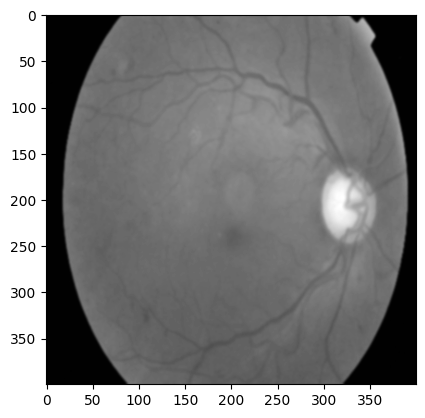

In [40]:
plt.imshow(blur,cmap="gray")

In [47]:
thresh=cv2.threshold(blur,10,255,cv2.THRESH_BINARY)

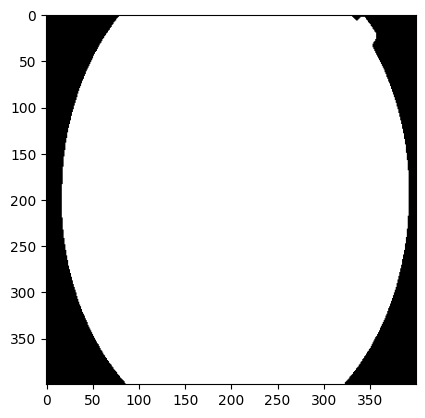

In [48]:
plt.imshow(thresh[1],cmap="gray")

In [49]:
contour=cv2.findContours(thresh[1],cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [55]:
contour=contour[0][0]

In [56]:
contour.shape

(409, 1, 2)

In [57]:
contour=contour[:,0,:]

In [59]:
contour.shape

(409, 2)

In [60]:
contour[:,0].argmax()

307

In [61]:
left=contour[contour[:,0].argmin()]
right=contour[contour[:,0].argmax()]
top=contour[contour[:,1].argmin()]
bottom=contour[contour[:,1].argmax()]

In [63]:
x1=left[0]
y1=top[1]
x2=right[0]
y2=bottom[1]

In [64]:
crop_ilk=img_list[4].copy()[y1:y2,x1:x2]

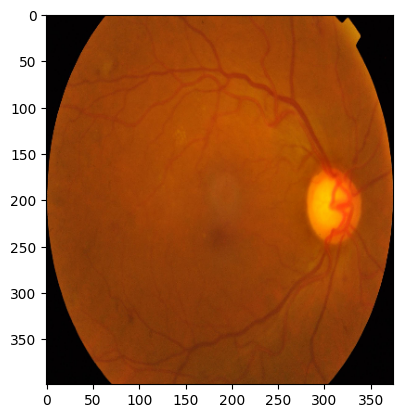

In [65]:
plt.imshow(crop_ilk)

In [66]:
crop_ilk.shape

(399, 374, 3)

In [68]:
crop_ilk=cv2.resize(crop_ilk,(400,400))

In [69]:
crop_ilk.shape

(400, 400, 3)

In [74]:
x=(x2-x1)*4//100
y=(y2-y1)*5//100

In [75]:
x

14

In [76]:
y

19

In [79]:
crop_ilk=img_list[4].copy()[y1+y:y2-y,x1+x:x2-x]
crop_ilk=cv2.resize(crop_ilk,(400,400))

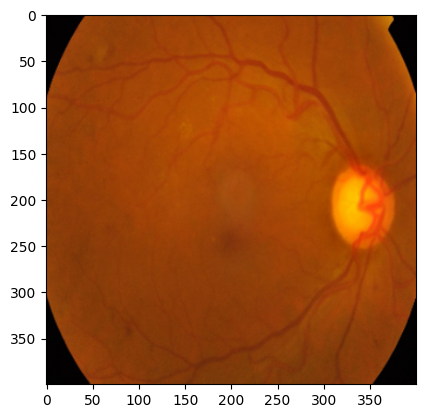

In [80]:
plt.imshow(crop_ilk)

CLAHE operations

In [81]:
lab=cv2.cvtColor(crop_ilk,cv2.COLOR_RGB2LAB)

In [83]:
lab.shape

(400, 400, 3)

In [84]:
l,a,b=cv2.split(lab)

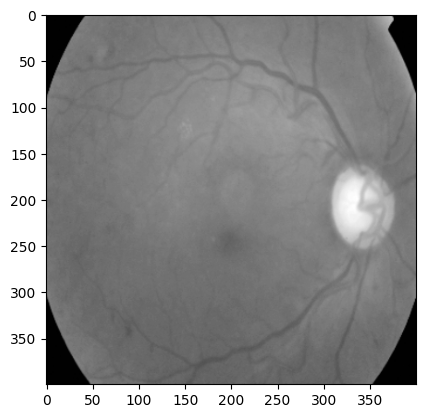

In [88]:
plt.imshow(l,cmap="gray")

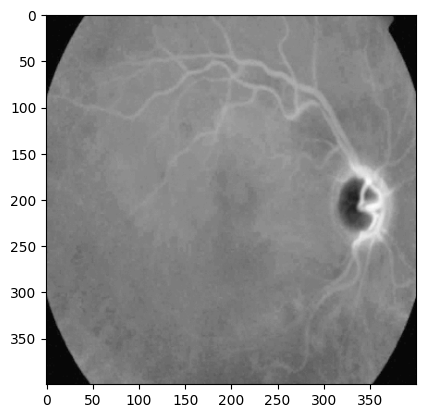

In [89]:
plt.imshow(a,cmap="gray")

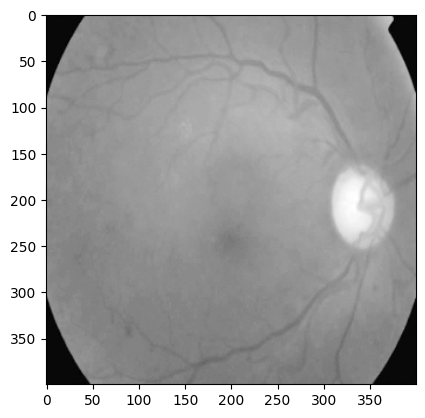

In [90]:
plt.imshow(b,cmap="gray")

In [91]:
flatten=l.flatten()

In [92]:
flatten.shape

(160000,)

(array([ 6748.,    77.,    55.,    53.,    53.,    73.,   111.,  2629.,
        29288., 49731., 45236., 16693.,  4827.,   795.,   836.,   607.,
          487.,   461.,   472.,   524.,   244.,     0.,     0.,     0.,
            0.]),
 array([  0. ,  10.2,  20.4,  30.6,  40.8,  51. ,  61.2,  71.4,  81.6,
         91.8, 102. , 112.2, 122.4, 132.6, 142.8, 153. , 163.2, 173.4,
        183.6, 193.8, 204. , 214.2, 224.4, 234.6, 244.8, 255. ]),
 <BarContainer object of 25 artists>)

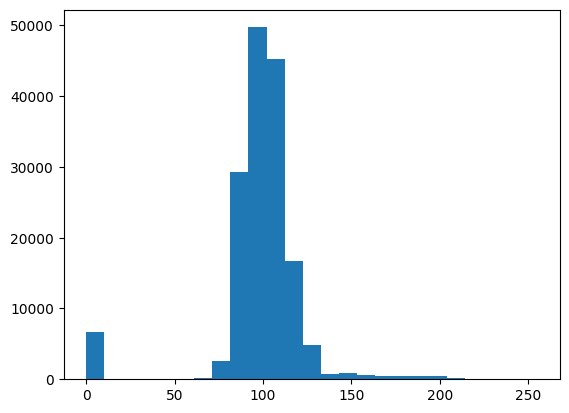

In [94]:
plt.hist(flatten,25,[0,255])

In [95]:
clahe=cv2.createCLAHE(clipLimit=7.0,tileGridSize=(8,8))

In [96]:
clahe=clahe.apply(l)

(array([ 1916.,  4850.,   139.,   424.,  1448.,  2835.,  3813.,  5701.,
         9440., 15891., 24388., 23869., 21076., 16164., 10656.,  7020.,
         3994.,  2705.,  1572.,   728.,   460.,   278.,   209.,   217.,
          207.]),
 array([  0. ,  10.2,  20.4,  30.6,  40.8,  51. ,  61.2,  71.4,  81.6,
         91.8, 102. , 112.2, 122.4, 132.6, 142.8, 153. , 163.2, 173.4,
        183.6, 193.8, 204. , 214.2, 224.4, 234.6, 244.8, 255. ]),
 <BarContainer object of 25 artists>)

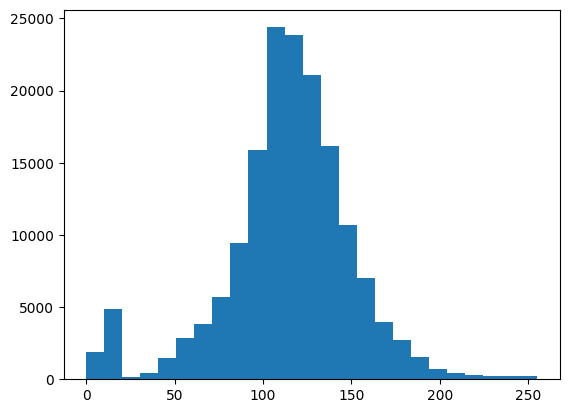

In [98]:
plt.hist(clahe.flatten(),25,[0,255])

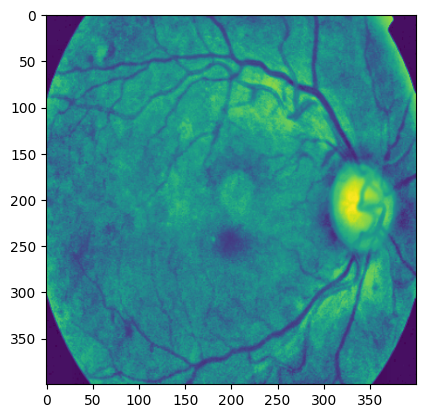

In [101]:
plt.imshow(clahe)

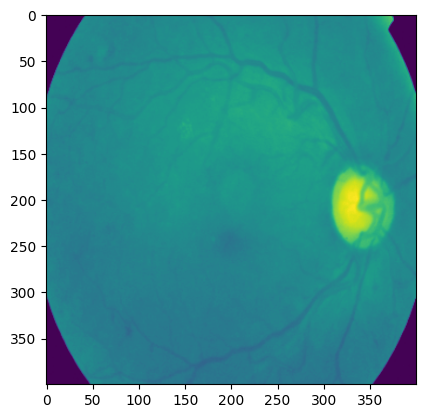

In [103]:
plt.imshow(l)

In [104]:
merged_image=cv2.merge((clahe,a,b))

In [105]:
final=cv2.cvtColor(merged_image,cv2.COLOR_LAB2RGB)

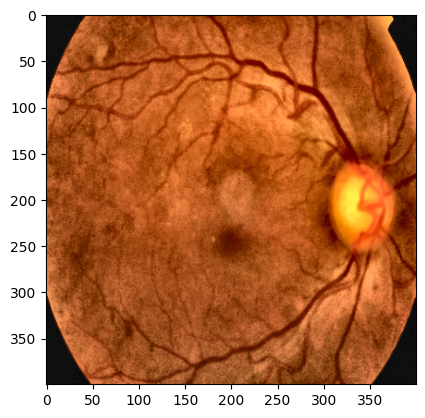

In [106]:
plt.imshow(final)

**Median Blur**

In [114]:
med_blur=cv2.medianBlur(final,3)

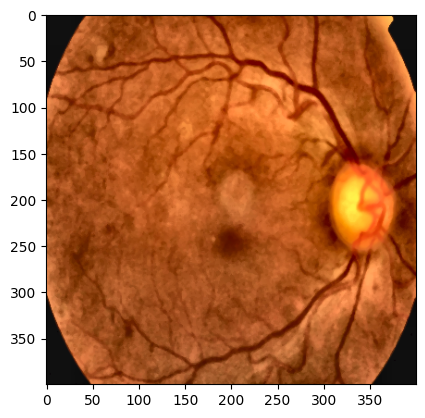

In [115]:
plt.imshow(med_blur)

In [117]:
background=cv2.medianBlur(final,39)

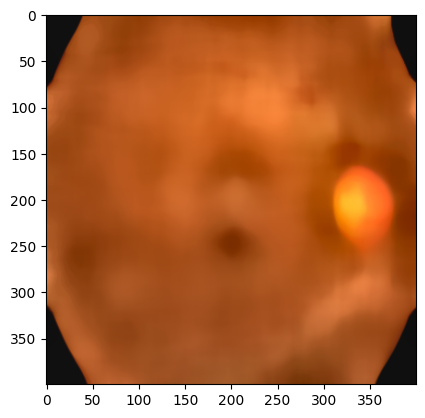

In [118]:
plt.imshow(background)

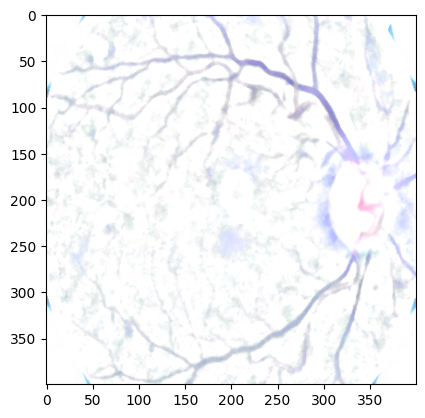

In [127]:
mask=cv2.addWeighted(med_blur,1,background,-1,255)
plt.imshow(mask)

In [128]:
final_img=cv2.bitwise_and(med_blur,mask)

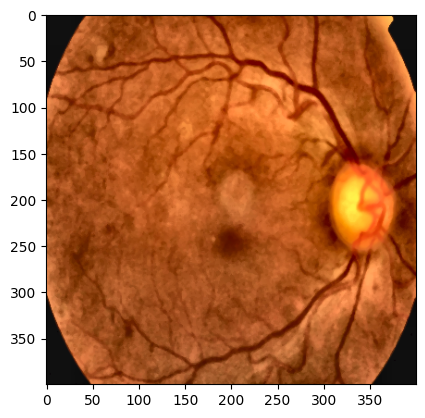

In [129]:
plt.imshow(med_blur)

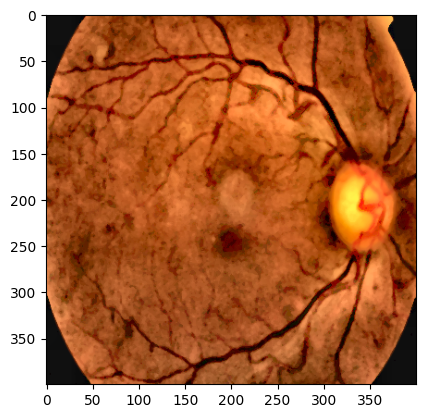

In [130]:
plt.imshow(final_img)

In [169]:
from tqdm import tqdm_notebook as tqdm
img_list_preprocess=list()
for i in tqdm(files):
  img=cv2.imread("train_images/"+i)
  img=cv2.resize(img,(400,400))
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  copied_file=img.copy()
  copied_file=cv2.cvtColor(copied_file,cv2.COLOR_RGB2GRAY)
  blur=cv2.GaussianBlur(copied_file,(5,5),0)
  thresh=cv2.threshold(blur,10,255,cv2.THRESH_BINARY)
  contour=cv2.findContours(thresh[1],cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
  contour=contour[0][0]
  contour=contour[:,0,:]
  left=contour[contour[:,0].argmin()]
  right=contour[contour[:,0].argmax()]
  top=contour[contour[:,1].argmin()]
  bottom=contour[contour[:,1].argmax()]
  x1=left[0]
  y1=top[1]
  x2=right[0]
  y2=bottom[1]

  x=(x2-x1)*4//50
  y=(y2-y1)*5//50
  if x2-x1>100 and y2-y1>100:
   crop_ilk=img.copy()[y1+y:y2-y,x1+x:x2-x]
   crop_ilk=cv2.resize(crop_ilk,(400,400))
  lab=cv2.cvtColor(crop_ilk,cv2.COLOR_RGB2LAB)
  l,a,b=cv2.split(lab)
  clahe=cv2.createCLAHE(clipLimit=7.0,tileGridSize=(8,8))
  clahe=clahe.apply(l)
  merged_image=cv2.merge((clahe,a,b))
  final=cv2.cvtColor(merged_image,cv2.COLOR_LAB2RGB)
  med_blur=cv2.medianBlur(final,3)
  background=cv2.medianBlur(final,37)
  mask=cv2.addWeighted(med_blur,1,background,-1,255)
  final_img=cv2.bitwise_and(med_blur,mask)
  img_list_preprocess.append(final_img)

<ipython-input-169-f76f6fe35632>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(files):


  0%|          | 0/3662 [00:00<?, ?it/s]

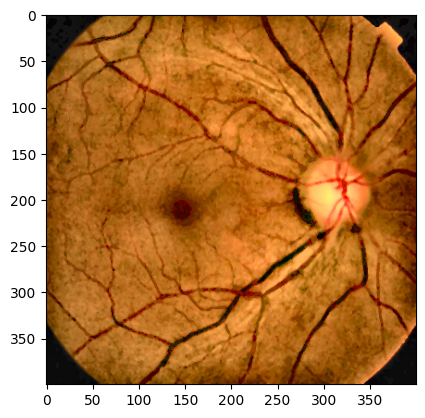

In [168]:
plt.imshow(img_list_preprocess[8])

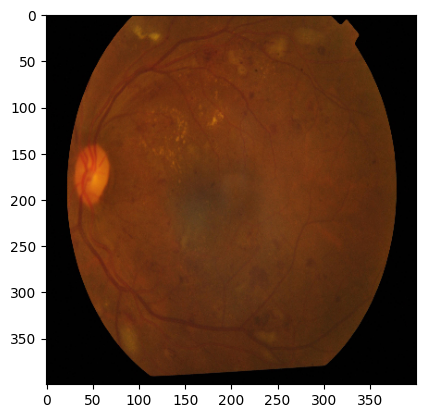

In [156]:
plt.imshow(img_list[2])

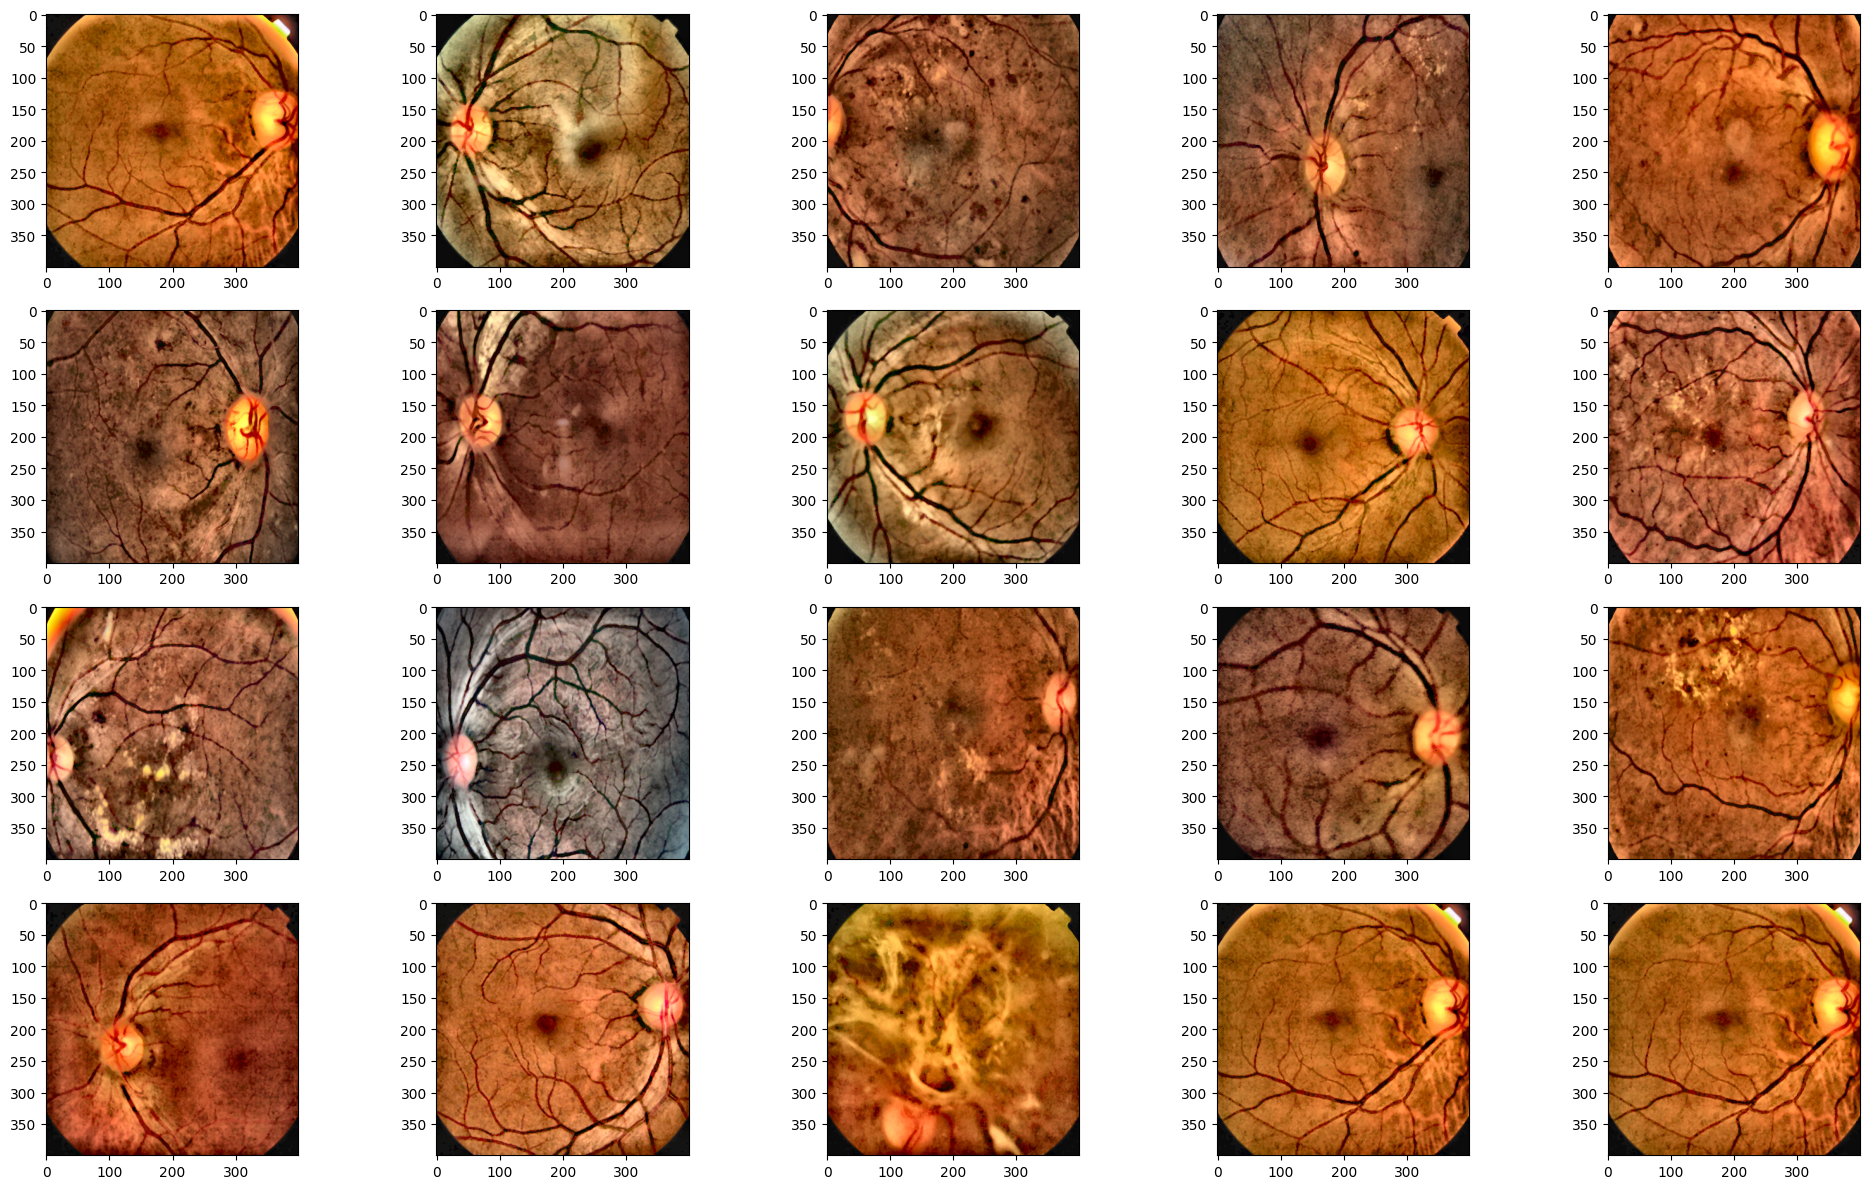

In [178]:
fig=plt.figure(figsize=(20,12))
for i in range(20):
  img=img_list_preprocess[i]
  fig.add_subplot(4,5,1+i)
  plt.imshow(img)
plt.tight_layout()